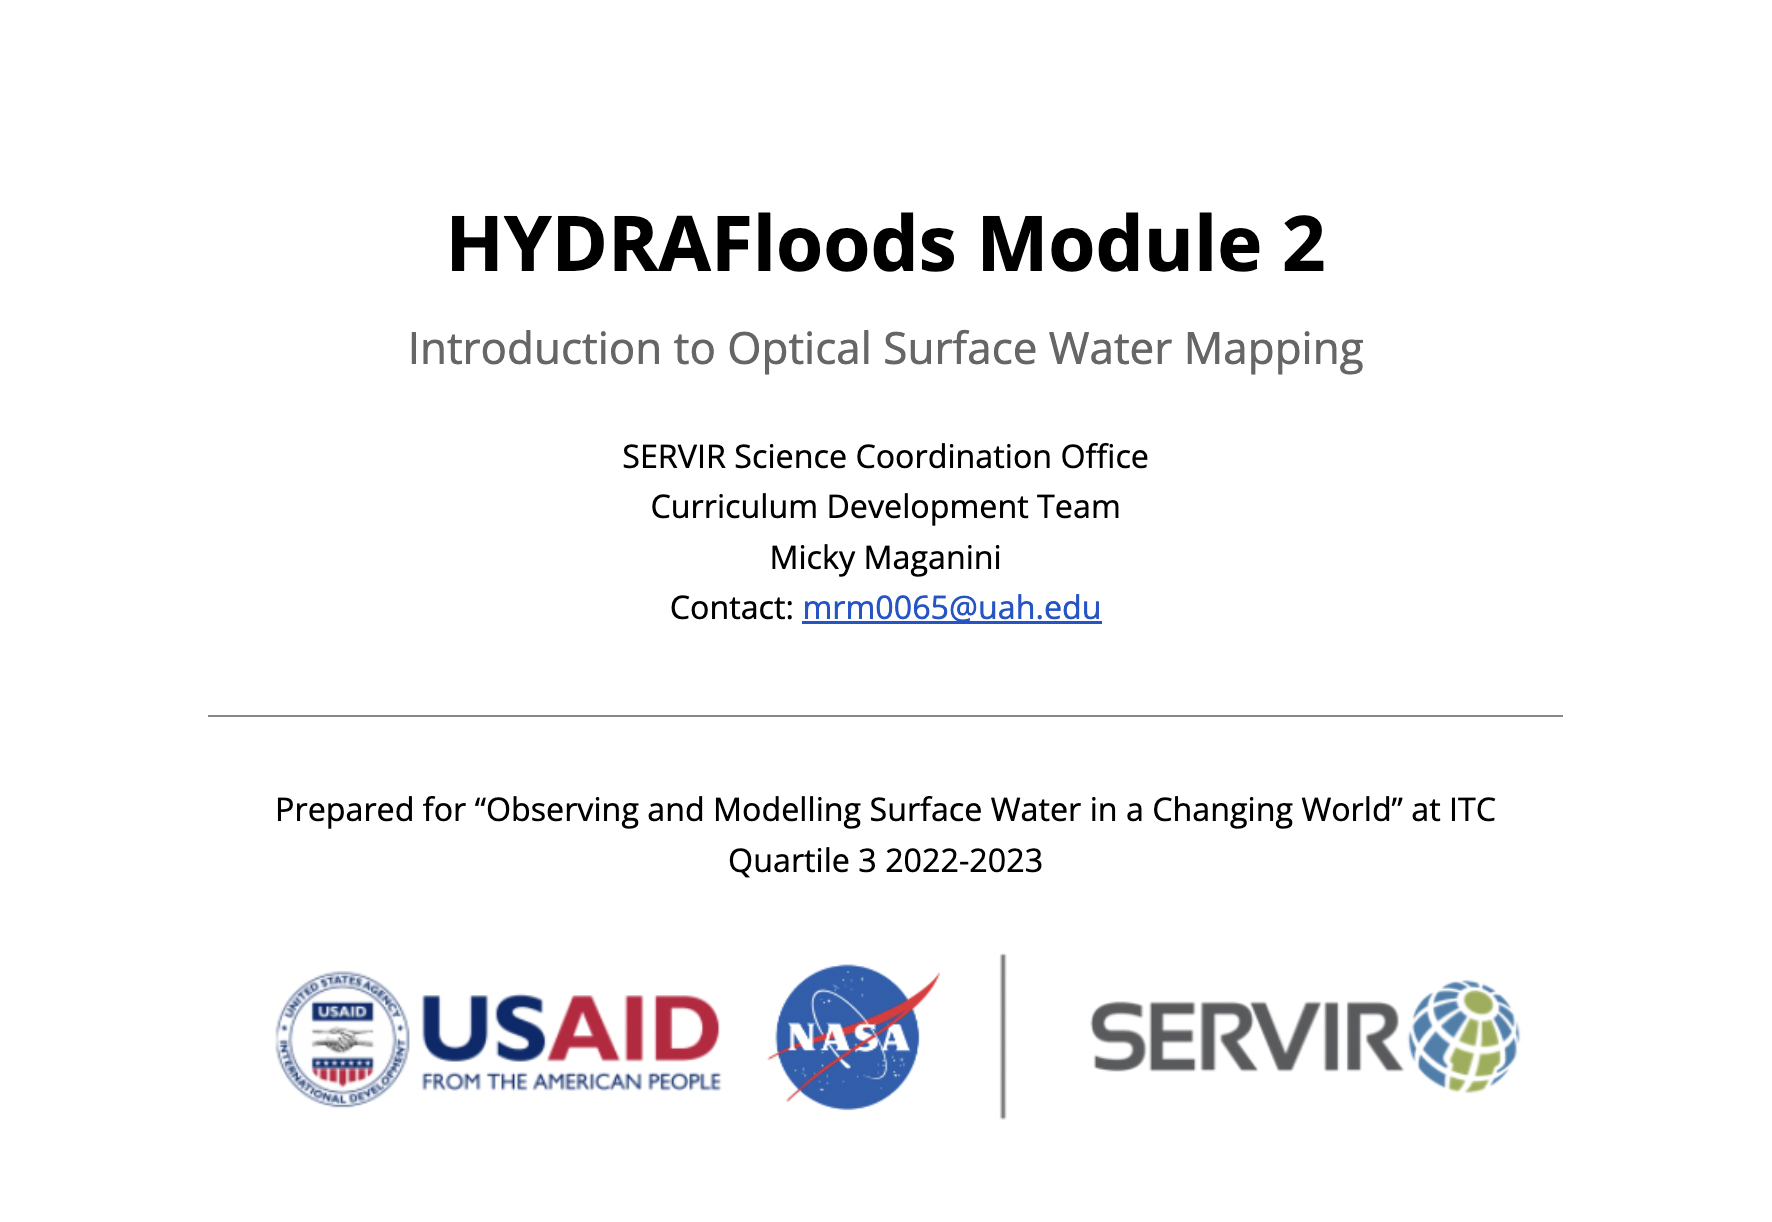

# Prerequisites and Requirements


### Requirements
For this module, you will need a...

* Computer
* A moderately fast internet connection
  * If your internet connection is not very fast, some of the code cells may return errors when run. Reference the [supplementary material for module 2](https://docs.google.com/document/d/1c33JPm0eANXR_SyzOEPeG2BBSSVDWZHCaFePsK3cuYQ/edit?usp=sharing) to view errors and their solutions.
* a Google Earth Engine Account
* Membership of the "hydrafloods-for-itc" Google Cloud Project.

### Prerequisites

Before taking this module, it is required that you take [HYDRAFloods Module 1](https://docs.google.com/document/d/1wZnkCwEVj9vB2YuHw2Uq1VamHk-et7eeqEiY1Ffk_uE/edit?usp=sharing), which will show you how to register a Google Earth Engine account and join the "hydrafloods-for-itc" Google Cloud Project.

# Learning Objectives

By the end of this module, you will...


*   Know what optical datasets are available for use in HYDRAFloods.
*   Understand how to use HYDRAFloods's Quality Assurance feature to mask out poor quality pixels.
*   Understand how to implement illumination correction on optical data in HYDRAFloods.
*   Understand and apply median composites to optical data.
*   Understand what a water index is.
*   Apply automated thresholding algorithms on optical imagery to create a binary image of water and non-water classes.

---

# **Step 1: Make a Copy of This Notebook**

Towards the top of this page, click **File** --> **Save a copy** in Drive in order to make a personal copy of this notebook. You can then follow along in your personal notebook for the rest of the module and play around with the code as you wish. Click **File** --> **Save** regularly to save your progress.

---

# **Step 2: Install HYDRAFloods**

Our first step whenever we work with HYDRAFloods is to install the HYDRAFloods package. We have to run this cell every time we want to use HYDRAFloods.

We can install hydrafloods using `!pip install` as we will see in the following code cell. We will simultaneously install the `geemap` module, which we will use to visualize our data from Google Earth Engine within this notebook.

In [ ]:
!pip install hydrafloods geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=7d28b06edbea664aa4aa42166054be6c0a1e736cfb10cce3b9886b7df7965cce
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
  Created wheel for pipetools: filename=pipetools-1.1.0-py3-none-any.whl size=13602 sha256=bf8416d478d307db3bf25c6f63971175446ed592190ba51180e0610fe6a99d6e
  Stored in directory: /root/.cache/pip/wheels/3e/66/b3/357ae471d72e8b2fabf98f8395730c146e15c2be70c4c8c3

Now that we have installed our packages, it's time to import them via `import` so we can use them in this notebook. Below you can find a brief description of what each package does

* The `geemap` package will allow us to visualize our map and map layers interactively within this notebook.
* The `ee` package will allow us to run Earth Engine functions via the python programming language
* Finally we will import `hydrafloods` as `hf` for short and import the `corrections` module from hydrafloods. This module will be used in our data processing, which we will expand on later.

In [ ]:
import geemap
import geemap.colormaps as cm
import ee
import hydrafloods as hf
from hydrafloods import corrections

Now, we have to authenticate and initialize earth engine. Before running the code below, [click here](https://docs.google.com/document/d/1-cfsfzYvYE9yR6kApeEa0ovnp01vXMmMQpDv1WlWBaY/edit?usp=sharing) to view the supplementary material for this module. It is recommended that you have this document open in a separate window, as it will walk you through the authentication process that is triggered by running the cell below.

In [ ]:
ee.Authenticate()

ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=O03KPxCAXgQnVhAiP6Ms9n7QgpseIDJSA94NfcszfAE&tc=yv_u7twrfQuy-fsppjHe523q8yosjhFyPUGoiCPzbBQ&cc=wV9xKyZ3QYNw_DB1x8fdoN9NBwuZZXLEbo7kKo2bSw8

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXn--Fno_8UEvoo7iuWIIGkZUIsMdZNiL4oTmhd_l7anaTLgwBQPxQk

Successfully saved authorization token.


Next, we will run the `Map` module of `geemap` to allow us to view the earth engine interface within this notebook.

In [ ]:
_ = geemap.Map()

Finally, we want to check what version of HYDRAFloods to make sure we are running the latest version (which is "2021.10.11")

In [ ]:
hf.__version__

'2023.10.14'

---
# **Step 3: Acquire Data**

First, we will define our area of interest using the Earth Engine or `ee` method `ee.Geometry.Polygon`.

In [ ]:
region = ee.Geometry.Polygon(
    [[[36.12, -0.79],
    [36.12, -0.67],
    [36.25, -0.67],
    [36.25, -0.79]]]
)

Next, we will print our region. You can click on the output below to investigate how our region is stored in Earth Engine.

In [ ]:
region

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              36.12,
              -0.79
            ],
            [
              36.12,
              -0.67
            ],
            [
              36.25,
              -0.67
            ],
            [
              36.25,
              -0.79
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

Next, we will define a start period and end period as a string in "YYYY-MM-DD" format.

In [ ]:
start_time = "2021-06-01"
end_time = "2021-09-30"

Now that we have a region and time period of interest, we will use our first hydrafloods method: `hf.Landsat8`. This is a method to which we will feed a region of interest, a start time, and an end time (in that order). Then, HYDRAFloods will get all of the Landsat 8 data over that region and during that time period.

HYDRAFloods also offers access to other optical datasets, such as VIIRS, MODIS, Sentinel 2, Landsat 7, and Landsat 9.

To know what parameters we feed to `hf.Landsat8` and in what order, we reference the [HYDRAFloods documentation](https://servir-mekong.github.io/hydra-floods/). On the left side of the documentation, you can see a header titled "API Reference". This document is very helpful when working with HYDRAFloods as it tells you how to perform different functions, tells you what parameters are given for each function, and what the default values of those parameters are.

You can also view the source code of HYDRAFloods at its [Github](https://servir-mekong.github.io/hydra-floods/) page.

In [ ]:
lc8 = hf.Landsat8(region, start_time, end_time)

We can print the dataset to see how HYDRAFloods is storing our data

In [ ]:
print(lc8)

HYDRAFloods Dataset:
{'asset_id': 'LANDSAT/LC08/C02/T1_L2',
 'end_time': '2021-09-30',
 'name': 'Landsat8',
 'region': [[[...], [...], [...], [...], [...]]],
 'start_time': '2021-06-01'}


Next, we can use the `n_images` method to find out how many images we have to work with.

In [ ]:
print("Number of images over Lake Naivasha from June to September 2021:", lc8.n_images)

Number of images over Lake Naivasha from June to September 2021: 15


In order to represent all of the images in our dataset with a single image, we can apply what is known as a reducer. A reducer, in this case a median temporal reducer, will take the value for each pixel at a certain time and apply some mathematical function to it, to reduce it to a single value, rather than 15 disparate values.

In this case, we will apply a median reducer using `collection.median`. For more information on reducers, [click here](https://docs.google.com/document/d/1Lv0GEh2nzqigoXPulkNT8ME_V4NKgt9gsIY6KxVj2_o/edit?usp=sharing)  and scroll to page 4 to read a chapter from the book "Cloud-Based Remote Sensing with Google Earth Engine".

This open source book contains a full tutorial of Google Earth Engine, and can be accessed by [clicking here](https://www.eefabook.org/go-to-the-book.html).

In [ ]:
lc8_single = lc8.collection.median()            # Apply a median reducer to our image using "collection.median()"

To visualize this image, we will need some visualization parameters. This usually consists of specifying a minimum and maximum value, the bands to visualize, as well as some optional additional parameters. Let's ask`hydrafloods` what bands are available to visualize this dataset using the `bandNames()` method.

After running the cell below, you will see what is known as a list in the programming world with an expander arrow(▹) next to it. Clicking on this arrow will expand the list and show you its content. This is how our data is stored in Earth Engine.

In [ ]:
lc8_single.bandNames()                          # print the band names using `bandNames`

As we can see, we have our three visible bands (blue, green, and red), a near infrared band, and two short wave infrared bands. Let's create a true color composite by assigning the red, green, and blue bands to the red, green, and blue channels respectively. The first band we type into the "bands" parameter will be assigned to the red channel, the second will be assigned to the green channel, and the third will be assigned to the blue channel.

For more information regarding bands and channels, along with how to common band combinations used in optical remote sensing, [click here](https://earthobservatory.nasa.gov/features/FalseColor/page3.php) to read a NASA Earth Observatory Article on the subject.

In [ ]:
viz_params = {
    "min": 50,
    "max": 2000,
    "bands": "red,green,blue",
    "gamma": 1.5,
    "dimensions": 1024
}

Now that we have defined our region and time period of interest, acquired some imagery, and defined some visualization parameters, we can visualize our data using the `geemap` package that we imported earlier.

In [ ]:
_ = geemap.Map()           # initialize the geemap module

After running the cell below, a map display will pop up. You can zoom in by scrolling up or clicking the "+" button in the upper left, and zoom out by scrolling down or clicking the "-" button in the upper left. Click and drag on the map interface to move around. Finally, you can turn different layers on and off by clicking the 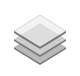 icon, then clicking different layers.

In [ ]:
Map = geemap.Map(center=(-0.755, 36.35), zoom=12)                # Setting the center of the map display on Lake Naivasha

Map.addLayer(lc8_single, viz_params, 'Landsat 8 Single Image')

Map.addLayerControl()
Map

Map(center=[-0.755, 36.35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

# **Exercise 1: False Color Composite**

Now it's your turn! Using the code cells below, create a false color composite by defining other bands in the "bands" parameter in the code cell below. Recall your past remote sensing knowledge to consider what bands might be useful for visualizing water and distinguishing it from vegetation. When typing in your bands, make sure to enter them as a comma separated string with **no spaces**.

Recall that the bands you have to choose from are called "blue, green, red, nir, swir1, and swir2", and that the first band typed in will be show as red, the second as green, and the third as blue. If your image is showing up as too dark, consider lowering your maximum value. If your image is showing up as too bright, consider raising your maximum value. If there is not enough contrast in your image, consider playing around with the "gamma" parameter (usually a value between 0 and 3, with higher values showing more contrast).

If you are getting stuck, click on the hidden code cells under the bolded text that says "Exercise 1 Answer" to see an example.

In [ ]:
my_viz_params = {
    "min": 50,
    "max": 4500,
    "bands": "ENTER YOUR BANDS HERE",      # enter your bands as a comma-separated string with no spaces in between them!
    "gamma": 1.5,
    "dimensions": 1024
}

Once you have changed the above cell you won't have to change anything in the cell below. Just click run!

In [ ]:
Map = geemap.Map(center=(-0.755, 36.35), zoom=12)

Map.addLayer(lc8_single, my_viz_params, 'My False Color composite')

Map.addLayerControl()
Map

EEException: ignored

In [ ]:
#@title Exercise 1 Solution: Click "Show code" below to see the solution! { display-mode: "form" }

## PLEASE NOTE: THIS IS NOT THE ONLY SOLUTION. YOUR IMAGE MAY LOOK COMPLETELY DIFFERENT DEPENDING
## ON THE BANDS YOU SELECTED. AS LONG AS AN IMAGE IS DISPLAYING, YOUR CODE IS CORRECT.


ans_viz_params = {
    "min": 50,
    "max": 4500,
    "bands": "swir1,nir,green",      # enter your bands as a comma-separated string
    "gamma": 1.5,
    "dimensions": 1024
}

Map = geemap.Map(center=(-0.755, 36.35), zoom=12)

Map.addLayer(lc8.collection.median(), ans_viz_params, 'My False Color composite')

Map.addLayerControl()
Map

---
# **Step 4: Quality Assurance**


You may have noticed that some portions of the image (for example, towards the top at the center) we just visualized are masked out by HYDRAFloods. This is because when we imported our data as a `hf.Dataset` using `hf.Landsat8(region, start_time, end_time)`, `hydrafloods` automatically applies a custom Quality Assurance (QA) protocol on the data.



This uses the "QA_PIXEL" and "QA_RADSAT" bands which are included in Landsat data, and will automatically mask out any pixels in which "QA_RADSAT" is 0, as well as any pixels in "QA_PIXEL" that are above a certain threshold value. If we would like to use all the data available and not just the good quality data, we can use the `use_qa` parameter and set it to `False` to see what the original data looks like.

In [ ]:
# Define a variable called l8_noqa that stands for no quality assurance landsat 8
# This will show us what the original Landsat 8 data looks like, not filtering out poor quality pixels

lc8_noqa = hf. Landsat8(region, start_time, end_time, use_qa = False)     # here we specify that we want use_qa to be False, when its default value is true

In [ ]:
lc8_noqa_single = lc8_noqa.collection.median()   # Make a median composite of the image collection that does not have quality assurance

Let's visualize both our quality-assurance image as well as our image where quality assurance is not implemented, and observe the differences. After running the cell below, you can click the layers icon (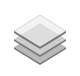), then clicking different layers.

In [ ]:
Map = geemap.Map(center=(-0.775, 36.3), zoom=12)


Map.addLayer(lc8_single, viz_params, 'Quality Assurance Applied')                       # Add lc8_single, the image from our landsat 8 collection that we defined earlier. This image uses Quality Assurance Protocols
Map.addLayer(lc8_noqa_single, viz_params, 'NO Quality Assurance')                       # Add lc8_noqa_single, the image we just defined that does not use Quality Assurance Protocols.

Map.addLayerControl()
Map

Map(center=[-0.775, 36.3], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

# Question 1

What differences, if any, can you observe between the two images? Type your answer in the text cell below

In [ ]:
#@title Question 1 Solution: Click "Show code" below to see the solution! { display-mode: "form" }

# We can see that many of our pixels in the image collection where we did not use the Quality Assurance Function are cloudy, whereas
# our image collection that does use the quality assurance function are clear and allow us to see what is happening on the surface.
# Thus, while setting the "use_qa" parameter to "false" gives us more data, in most cases it is better to work with the default settings, as we can
# remove clouds from our data.

---
# **Step 5: Additional Pre-processing**

When we use hydrafloods to request geospatial data (i.e. using`hf.Landsat8()`, we are retrieving the data from Google Earth Engine (GEE). GEE has already applied some preprocessing on the Landsat 8 collection, such as atmospheric correction. However, we can go beyond this default preprocessing. A common processing step for optical imagery is the application of illumination correction.

Illumination correction refers to the compensation for solar irradiance to minimize the variability of observed reflectance for similar targets due to topography and other image artifacts.

While the complete methodology associated with illumination correction are beyond the scope of this module, one of the steps in illumination correction is to use a digital elevation model (DEM) to correct the effects of positive relief and shadows caused by topography in the image. By using a DEM, we can determine which areas are affected by shadows and adjust the brightness accordingly.

In [ ]:
# Obtain a Digital Elevation Model, in this case we will use the JAXA ALOS AW3D30 DEM.
elv = ee.Image('JAXA/ALOS/AW3D30/V2_2').select("AVE_DSM")

# Apply the illumination correction on every image in the dataset
ls_flat = lc8.apply_func(corrections.illumination_correction, elevation=elv)

# Get the first image from the Landsat Dataset which we have applied illumination correction to.
ls_flat_median = ls_flat.collection.median()

In [ ]:
Map= geemap.Map(center = (-0.755, 36.35), zoom = 12)

Map.addLayer(lc8_single, viz_params, 'No Illumination Correction Applied')
Map.addLayer(ls_flat_median, viz_params, 'Illumination Correction Applied')

Map.addLayerControl()
Map

EEException: ignored

# Question 2:

Click the Layers icon (which looks like three horizontally stacked squares) towards the top right of the map display above and click different layers to turn them off and on. What difference -- if any -- do you notice between the image where illumination correction is applied and the image where no illumination correction is applied?

Hint: Look towards the left side of the image.

Type your answer in the empty text cell below.

In [ ]:
#@title Question 2 Solution: Click "Show code" below to see the solution! { display-mode: "form" }

# We can see to the West of the Lake there is a mountainous region, causing shadows in the imagery in the image where illumination correction is not applied.
# When we view the imagery where illumination correction has been applied, these shadowy regions now appear illuminated.

---
# **Step 6: Thresholding**

Now that we have acquired our data and performed the necessary preprocessing, we are ready to map surface water! To do this using optical imagery, we often  use what is called a water index. An index refers to a mathematical value calculated from one or more bands of an image. The purpose of an index is to highlight certain features or characteristics of the image, which in this case is water!

There are many water indices available within HYDRAFloods. You can view these indices, their associated formulas, and their code within HYDRAFloods in the supplementary material, which can be accessed by clicking [here.](https://docs.google.com/document/d/17RvsyMZxKrdDiipwccyLecX2t7NNOtbeewafmbi38Yc/edit?usp=sharing)

Below, we will use the Modified Normalized Difference Water Index (MNDWI) on our Landsat 8 time series. The Modified Normalized Difference Water Index will use the below formula, calculating the difference in radiance between the green and short-wave infrared bands, and output a value between -1 and 1 for each value. Values closer to 1 are more likely to be water, whereas values closer to -1 are more likely to be non-water.

$ MNDWI: \frac{(green - swir1)}{(green +swir1)} $

In [ ]:
# Apply MNDWI Water Index
lc8_mndwi = ls_flat.apply_func(hf.add_indices, indices=["mndwi"])

The above function will calculate the mndwi at every pixel for every image in our `ls_flat` image collection, which is the Landsat 8 data with quality assurance and illumination correction applied.

A common approach to surface water mapping involves using a thresholding algorithm to create a binary image. A binary image simply means our output map will have two classes, non-water and water. Our thresholding algorithm (in this case called the Edge Otsu algorithm) will automatically find a threshold value in the image histogram. Every value greater than this value will be classified as water and every value less than it will be classified as non-water.

We will be doing thresholding based on the MNDWI band, which can be seen below. The Edge Otsu algorithm works will with bimodal histograms, which we have in this case. While the exact methodology of the Otsu Algorithm is beyond the scope of this module, we know that the threshold will be somewhere between these two peaks.

Visualizing the histogram below will help us identify a good value for the `initial_threshold` parameter of the edge_otsu algorithm in hydrafloods. This will be the first threshold value checked by the algorithm, and should be your guess for a good threshold, and sould fall about halfway between the two peaks in your histogram. In this case, we will set the `initial_threshold` value to 0.

Another parameter to feed to the otsu algorithm is `init_no_threshold`. This parameter has a defualt value of -0.2, and will be the threshold value if the histogra, is empty (little to no water in the image). We want to associate this value with our "land" class, so in this case it should be less than our `initial_threshold` value. If we do not feed this parameter to HYDRAFloods, the thresholding will fail and return an error if there are any masked pixels in the region.


For more information on Otsu's Algorithm, [click here](https://www.youtube.com/watch?v=jUUkMaNuHP8) to watch a Youtube video on the subject.

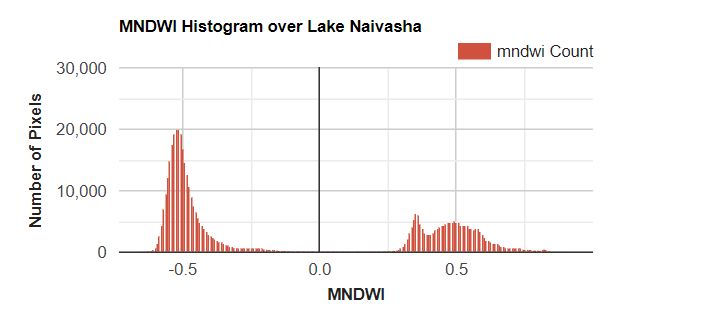

Before we perform our thresholding algorithm, we will use a temporal reducer that represents every date at which we have imagery. We can use median, mode, sum, or first reducers. In this case, we will use the median reducer.

In [ ]:
# Apply a median reducer.
lc8_median = lc8_mndwi.collection.median()

In [ ]:
# apply edge otsu algorithm on the MNDWI optical index, using the "MNDWI" band to perform thresholding.
water_map = hf.edge_otsu(
    lc8_median,                                # the image to perform thresholding on
    region= region,                            # the region to perform thresholding on
    band="mndwi",                              # the band to perform thresholding on
    initial_threshold=0,                       # our initial guess for a good threshold between water and nonwater
    thresh_no_data=-0.2,                       # MNDwI value to give to masked pixels
    invert=True
)

# define some visualization parameters for our water map
water_viz = {
    "min": 0,
    "max": 1,
    "palette": ['D3D3D3', '000080'],
    "region": region,
    "dimensions": 2000
}

In [ ]:
Map = geemap.Map(center = (-0.755, 36.35), zoom = 12)


#Map.addLayer(lc8_median, viz_params, 'Landsat 8 Median Composite')
#Map.addLayer(water_map, water_viz, 'Water Map')

Map.addLayerControl()
Map

Map(center=[-0.755, 36.35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

Note that we are getting some interesting, possibly false detection of water below the southern edge of the lake. Viewing the imagery, we can see that these are greenish-white regions that are occuring in close proximity to agricultural fields. Further investigation into this region revealed that they are from greenhouses used by the rose industry, which can be seen in [this picture](https://drive.google.com/file/d/1JtmlHgcRDcDiKJR5ukOPhSNzJWtI8xrP/view?usp=sharing). To view the article this photo is sourced from, [click here.](https://ecoligo.com/en/blog/2018/07/05/questions-from-the-crowd-does-rift-valley-roses-impact-water-levels-at-lake-naivasha/)

Now let's repeat the entire surface water mapping process for 2014 and see how much water the lake has gained or lost since then.

In [ ]:
# Define Time period of interest
pre_start_date = "2014-06-01"
pre_end_date = "2014-09-01"

# Get Landsat 8 imagery over Lake Naivasha from this time period. Quality assurance will automatically be performed in this step.
pre_l8 = hf.Landsat8(region, pre_start_date, pre_end_date)

# Make sure there is imagery for this time period
print("Number of Landsat 8 images over Lake Naivasha in Summer 2014:", pre_l8.n_images)

# Apply Illumination Correction
l8_pre_flat = pre_l8.apply_func(corrections.illumination_correction, elevation=elv)

# Add a band for MNDWI
l8_pre_mndwi = l8_pre_flat.apply_func(hf.add_indices, indices=["mndwi"])

# Create a median composite of the imagery
l8_pre_composite = l8_pre_mndwi.collection.median()

# Apply edge otsu thresholding algorithm
pre_water_map = hf.edge_otsu(
    l8_pre_composite,
    region= region,
    band="mndwi",
    initial_threshold=0,
    thresh_no_data=-0.2,
    invert=True
)

Number of Landsat 8 images over Lake Naivasha in Summer 2014: 12


NameError: ignored

HYDRAFloods also allows you to easily export images to your drive. Let's export the water map for 2014 to our Google Earth Engine Assets.

**NOTE**: You must change the portion of the code below that says **XXXXXXX** to your Google Earth Engine username in order to get it to run.

In [ ]:
lake_geom = ee.Geometry.Rectangle(36.267, -0.848, 36.448, -0.659)

In [ ]:
hf.geeutils.export_image(
    pre_water_map,
    lake_geom,
    "users/XXXXXX/initial_water_map_example",  # CHANGE THE XXXXXX in this line to your GEE Username
    scale = 30
)

NameError: ignored

After running the above cell, a Google Earth Engine task will be started. You can view the progress of this task by going to the GEE code editor and navigating to the "Tasks" tab on the right side of the screen.

Note: The below cell may take a while to run if you have a slow internet connection. If your connection is very slow, the computation may time out and return an error. In this case, comment out some of the lines of code (by putting a # at the beginning of the line) and try again.

In [ ]:
Map = geemap.Map(center = (-0.755, 36.35), zoom = 12)


Map.addLayer(lc8_median, viz_params, '2021 Landsat 8 Median Composite')
Map.addLayer(water_map, water_viz, '2021 Water Map')
Map.addLayer(l8_pre_composite, viz_params, 'Landsat 8 Summer 2014')
Map.addLayer(pre_water_map, water_viz, '2014 Water Map')

Map.addLayerControl()
Map

NameError: ignored

# Question 3:

Turn the different Layers on and off. What -- if any-- changes can you observe in Lake Naivasha between 2014 and 2021? Hint: Look at the Northern edge of the Lake.

Type your answer in the text cell below.

In [ ]:
#@title Question 3 Solution: Click "Show code" below to see the solution! { display-mode: "form" }

# We can clearly see that there is growth in the surface area of the lake between 2014 and 2021, especially on the Northern edge of the lake.

We can get a clearer idea of what specific areas have gained or lost water between these two time periods using the `discrete_difference` method in HYDRAFloods. **NOTE**: This will return an image where there was water in our later time period, but did not have water in our earlier time period.

In [ ]:
lake_diff = hf.discrete_difference(water_map, pre_water_map)

Map = geemap.Map(center = (-0.755, 36.35), zoom = 12)

Map.addLayer(lake_diff, water_viz, 'Difference in water between 2014 and 2021')

Map.addLayerControl()
Map

Map(center=[-0.755, 36.35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

Let's Calculate the surface area change of the lake using `ee.ReduceRegion`, an Earth Engine method.

In [ ]:
water_px = lake_diff.eq(1)                             # Get all the pixels where our lake_diff image equals 1 (i.e. where there is water in 2021 but not in 2014, or vice versa)

area_image = water_px.multiply(ee.Image.pixelArea())   # Use .pixelArea to get the Area of pixels where lake_diff equals 1

# We will use a more specific region surrounding the edge of the lake in 2021 to post process out the greenhouse farms in our area calculation
view_region = ee.Geometry.Polygon(
  [
    [
      [36.2574165, -0.825466292],
      [36.3614433, -0.83233203],
      [36.40058214, -0.8086452],
      [36.420838191, -0.78186859],
      [36.43045122, -0.755778412],
      [36.42942126, -0.737927146],
      [36.419464900, -0.718016033],
      [36.359751098, -0.70701434],
      [36.3604473649, -0.669038603],
      [36.333496529, -0.6700685],
      [36.319591957, -0.709891052],
      [36.2868046342, -0.72516772],
      [36.2574165, -0.825466292]
  ]
]);

area_water = area_image.reduceRegion(                   # Use reduce region to count the number of pixels where there is water change.
    reducer = ee.Reducer.sum(),                         # We will use the sum spatial reducer to count the pixels
    geometry = view_region,                             # Only count the pixels around Lake Naivasha's edge in 2021
    scale = 30,                                         # Use a scale of 30 meters, matching our Landsat 8 data, and thus also matching our water map
    maxPixels = 1e13
)

final_area = area_water.get('flood').getInfo() / 1e6    # Here we divide by a million to do a unit conversion from pixels to km^2.

print("Water Surface Area change between 2014 and 2021: {0:0.1f} km^2".format(final_area))

Water Surface Area change between 2014 and 2021: 19.2 km^2


# Exercise 2 -- Corrupted Code!

Below there is some code that your coworker wrote to apply an optical surface water mapping workflow over Lake Xau. But they spilled coffee on their computer, and the data has been corrupted! It's your job to fill in the missing code (represented by **"XXXXX"**).

Feel free to customize the optical dataset used, optical water index created, and thresholding algorithm applied. However, it should be noted that after experimentation with the different water indices, MNDWI consistently performs the best over this area.

Remember that based on the dataset you select, you will have to pick a time period for which that data is available. You can find this information by doing a simple google search of the dataset you are interested in working with.

**NOTE** : Lake Xau is not as straightforward as Lake Naivasha. It is a seasonal lake, only holding water for a few months out of the year. It may be of interest to your efforts that Botswana, where Lake Xau is situated, has two seasons: Summer (November - April) and Winter (May - October). Summer is known as the green season or rainy season and winter is known as the dry season. **It is recommended that you select time periods between August of 2011 and January 2016 and that you use Landsat7 data.**

- Define a region of interest
- Define a time period of interest
- Acquire optical data using `hf.<Dataset>`, choose from...
  - Landsat 8: `hf.Landsat8`
  - Landsat 7: `hf.Landsat7`
  - Sentinel 2: `hf.Sentinel2`
  - VIIRS: `hf.Viirs`
  - MODIS: `hf.Modis`
- Print the number of images in your dataset using `n.images` to make sure you have data for your area of interest
- Determine whether or not to apply Quality Assurance
- Apply Illumination Correction (optional)
-Calculate Water Index, choose from...
  - MNDWI: `hf.mndwi`
  - New Water Index: `hf.nwi`
  - General Water Index: `hf.gwi`
  - Automated Water Extraction Index -- No shadow: `hf.aewinsh`
  - Automated Water Extraction Index with Shadow: `hf.aewish`
  - Land Surface Water Index: `hf.lswi`
  - Water Ratio Index: `hf.wri`
  - Multi band Water Index: `hf.mbwi`
  - Modified Water Index: `hf.mwi`
- Apply thresholding Algorithm, choose from...
  - Edge Otsu: `hf.edge_otsu`
  - Bmax Otsu: `hf.bmax_otsu`
  - Kmeans Extent: `kmeans_extent`
- Visualize Final Map
- Use `hf.discrete_difference` to determine surface area change.

In [ ]:
# Define region of interest as an Earth Engine Polygon
# NOTE: YOU DO NOT NEED TO CHANGE ANYTHING IN THIS SECTION.

roi_xau = ee.Geometry.Polygon(
    [
        [24.8362, -21.3750],
        [24.8362, -21.2496],
        [24.6810, -21.2496],
        [24.6810, -21.3750]

    ]
)

# Define your initial time period using the "YYYY-MM-DD Format"
# It is recommended that you have about 3 months in between start and end time
# in order to limit the probability that all images are masked out by the QA method.
start_time_v1 = "XXXX-XX-XX"
end_time_v1 = "XXXX-XX-XX"

# Define your secondary time period using the "YYYY-MM-DD Format"
# It is recommended that you have about 3 months in between start and end time
# in order to limit the probability that all images are masked out by the QA method.
start_time_v2 = "XXXX-XX-XX"
end_time_v2 = "XXXX-XX-XX"

# Using hf.dataset, define two datasets, one over your region and initial time period of interest, and
# the second over your later time period of interest. Your first parameter given to hf.Dataset will
# be your region of interest, the second parameter will be your start time, and the third
# and final parameter will be your end time.

# Example:
data_v1 = hf.XXXXXXXX(roi_xau, XXXXX, XXXXXX)
data_v2 = hf.XXXXXXXX(XXXXX, start_time_v2, XXXXXX)


# Print the number of images using .n_images in each dataset to make sure we have data over this region and time period
n_v1 = XXXXX.n_images        # Define a variable for the number of images in data_v1
n_v2 = data_v2.X_XXXXXX       # Define a variable for the number of images in data_v2

print("Number of Images in Initial Time Period:", X_XX)   # Print the number of Images in n_v1
print("Number of Images in Later Time Period:", n_v2)    # Print the number of images in n_v2

# Define a Digital Elevation Model to base illumination correction on
# NOTE: YOU DO NOT HAVE TO CHANGE ANY CODE IN THE LINE BELOW.
elv = ee.Image('JAXA/ALOS/AW3D30/V2_2').select("AVE_DSM")

# Apply illumination correction on both datasets using apply_func
corrected_v1 = XXXX_XX.XXXXX_XXXX(corrections.illumination_correction, elevation = XXX)       # Apply illumination correction on data_v1 using the elv variable we just defined
corrected_v2 = XXXX_XX.apply_func(XXXXXXXXXX.XXXXXXXXXXXX_XXXXXXXXXX, XXXXXXXXX = XXX)        # Apply illumination correction on data_v2 using the elv variable we just defined

# Apply a water index on your dataset using apply_func and .add_indices.
# Select from one of the indices above.
index_v1 = XXXXXXXXX_XX.apply_func(hf.add_XXXXXXX, indices = ["XXXXX"])          # Apply a water index to corrected_v1
index_v2 = XXXXXXXXX_XX.XXXXX_XXXX(XX.XXX_XXXXXXX, XXXXXXX = ["XXXXX"])          # Apply a water index to corrected_v2

# Apply a median reducer to both datasets using collection.median()
median_v1 = index_v1.collection.XXXXXX()                                         # Apply a median reducer to index_v1
median_v2 = XXXXX_XX.XXXXXXXXXX.XXXXXX()                                         # Apply a median reducer to index_v2

# Apply Edge Otsu Algorithm to both datasets
xau_water_v1 = hf.edge_otsu(
    XXXXXX_XX,                     # The image to perform Edge Otsu Thresholding on. Here we want to input an image representing our initial time period.
    region= XXX_XXX,               # The region to perform Edge Otsu Thresholding for.
    band= "XXXXX",                 # The index that you defined when creating index_v1, and index_v2 to threshold based on
    initial_threshold=-1,
    thresh_no_data=0.5,
    edge_buffer=300,
    scale = 30,
    invert=True
)

xau_water_v2 = hf.edge_otsu(
    XXXXXX_XX,                 # The image to perform Edge Otsu Thresholding on. Here we want to input an image representing our later time period.
    region= XXX_XXX,            # The region to perform Edge Otsu Thresholding for.
    band="XXXXX",              # The index that you defined when creating index_v1, and index_v2 to threshold based on
    initial_threshold=-1,
    thresh_no_data=0.5,
    edge_buffer=300,
    scale=30,
    invert=True
)

# Define some visualization parameters for our optical imagery
viz_params = {
    "min": 0,
    "max": 5500,
    "bands": 'red,green,blue',
    "gamma": 1.5,
    "dimensions": 1024,
    "region": XXX_XXX                # The region to visualize
}

# Define some visualization parameters for our water map
water_viz = {
    "min": 0,
    "max": 1,
    "palette": ['D3D3D3', '000080'],
    "region": XXX_XXX,
    "dimensions": 2000                # The region to visualize
}


xau_diff = hf.discrete_difference(xau_water_v2, xau_water_v1)                         # If your later time period has less water than your initial time period, you will need to
                                                                                      # switch the positions of the two parameters (xau_water_v2 and xau_water_v1). If not, you
                                                                                      # can keep this code as it appears.

###################################################################################
#       NOTE: YOU DO NOT NEED TO CHANGE ANY OF THE CODE BELOW THIS COMMENT        #
###################################################################################

xau_px = xau_diff.eq(1)

xau_area_image = xau_px.multiply(ee.Image.pixelArea())

xau_area_diff = xau_area_image.reduceRegion(
    reducer = ee.Reducer.sum(),
    geometry = roi_xau,
    scale = 30,
    maxPixels = 1e13
)

final_area_xau = xau_area_diff.get('flood').getInfo() / 1e6

print("Water Surface Area change in Lake Xau between initial and later time period: {0:0.3f} km^2".format(final_area_xau))

Map = geemap.Map(center = (-21.3483, 24.7295), zoom = 12)

Map.addLayer(roi_xau, {}, 'Region of Interest')
Map.addLayer(median_v1, viz_params, 'Initial Period Imagery')
Map.addLayer(median_v2, viz_params, 'Later Period Imagery')
Map.addLayer(xau_water_v1, water_viz, 'Initial Period Water')
Map.addLayer(xau_water_v2, water_viz, 'Later Period Water')
Map

Map.addLayerControl()
Map



AttributeError: ignored

In [ ]:
#@title Exercise 2 Solution: click "show code" below to display the answer. { display-mode: "form" }


#Note: This is not the only answer! The volume change you calculate will depend on the time period you selected,
# the water index you used, and the thresholding algorithm applied. This is simply an example of how to implement
# this Workflow using Landsat 7 optical data, the MNDWI index, and the Edge Otsu algorithm.

#
# Define region of interest as an Earth Engine Polygon
roi_xau = ee.Geometry.Polygon(
    [
        [24.5188, -21.45],
        [24.5188, -21.2476],
        [24.9, -21.2476],
        [24.9, -21.45]
    ]
)

# Define Start and End times for Initial Time Period
pre_start_time = "2013-01-01"
pre_end_time = "2013-04-01"

# Define start and end time periods for later time period
post_start_time = "2015-01-01"
post_end_time = "2015-04-01"

# Get Landsat8 data using hf.Landsat
pre_xau_l8 = hf.Landsat7(roi_xau, pre_start_time, pre_end_time)
post_xau_l8 = hf.Landsat7(roi_xau, post_start_time, post_end_time)

# Print the number of images in each dataset to make sure we have data over this region and time period
pre_n = pre_xau_l8.n_images
post_n = post_xau_l8.n_images

print("Number of Images in 2013 Imagery:", pre_n)
print("Number of Images in 2015 Imagery:", post_n)

# Define a Digital Elevation Model to base illumination correction on
elv = ee.Image('JAXA/ALOS/AW3D30/V2_2').select("AVE_DSM")

# Apply illumination correction to both datasets
pre_flat = pre_xau_l8.apply_func(corrections.illumination_correction, elevation=elv)
post_flat = post_xau_l8.apply_func(corrections.illumination_correction, elevation=elv)

# Apply MNDWI Water Index to both datasets
pre_xau_mndwi = pre_flat.apply_func(hf.add_indices, indices=["mndwi"])
post_xau_mndwi = post_flat.apply_func(hf.add_indices, indices=["mndwi"])

# Apply a median reducer to both image collections to reduce them to a single image for visualization
pre_xau_single = pre_xau_mndwi.collection.median()
post_xau_single = post_xau_mndwi.collection.median()

# Apply Edge Otsu Algorithm to both datasets
pre_xau_water = hf.edge_otsu(
    pre_xau_single,
    region= roi_xau,
    band="mndwi",
    initial_threshold=0,
    thresh_no_data=-0.2,
    edge_buffer=300,
    scale = 30,
    invert=True
)

post_xau_water = hf.edge_otsu(
    post_xau_single,
    region=roi_xau,
    band="mndwi",
    initial_threshold=0,
    thresh_no_data=-0.2,
    edge_buffer=300,
    scale=30,
    invert=True
)


# Define some visualization parameters for our optical imagery
modis_viz_params = {
    "min": 0,
    "max": 5500,
    "bands": 'red,green,blue',
    "gamma": 1.5,
    "dimensions": 1024,
    "region": roi_xau
}

# Define some visualization parameters for our water map
water_viz = {
    "min": 0,
    "max": 1,
    "palette": ['D3D3D3', '000080'],
    "region": roi_xau,
    "dimensions": 2000
}

xau_diff = hf.discrete_difference(pre_xau_water, post_xau_water)             # Here we feed pre_xau_water as the first parameter, as we can observe this time period has more surface water.

xau_px = xau_diff.eq(1)

xau_area_image = xau_px.multiply(ee.Image.pixelArea())

xau_area_diff = xau_area_image.reduceRegion(
    reducer = ee.Reducer.sum(),
    geometry = roi_xau,
    scale = 30,
    maxPixels = 1e13
)

final_area_xau = xau_area_diff.get('flood').getInfo() / 1e6

print("Water Surface Area change in Lake Xau between 2012 and 2015: {0:0.3f} km^2".format(final_area_xau))

Map = geemap.Map(center = (-21.3483, 24.7295), zoom = 12)

Map.addLayer(roi_xau, {}, 'Region of Interest')
Map.addLayer(pre_xau_single, modis_viz_params, '2012 Imagery')
Map.addLayer(post_xau_single, modis_viz_params, '2015 Imagery')
Map.addLayer(pre_xau_water, water_viz, '2012 Water')
Map.addLayer(post_xau_water, water_viz, '2015 Water')
Map

Map.addLayerControl()
Map

Number of Images in 2013 Imagery: 4
Number of Images in 2015 Imagery: 4


Water Surface Area change in Lake Xau between 2012 and 2015: 42.127 km^2


Map(center=[-21.3483, 24.7295], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

# Works Cited
- [HYDRAFloods Documentation](https://servir-mekong.github.io/hydra-floods/)
- [Tan et al. 2012, "Improved Forest Change Detection with Terrain Illumination Corrected Landsat Images"](https://geog.umd.edu/sites/geog.umd.edu/files/pubs/1-s2.0-S0034425713001673-main.pdf)
- [Questions from the Crowd: Does Rift Valley Roses impact water levels at Lake Naivasha?](https://ecoligo.com/en/blog/2018/07/05/questions-from-the-crowd-does-rift-valley-roses-impact-water-levels-at-lake-naivasha/), July 5, 2018, Ecoligo.com
- Jian Tay Wei, Otsu's Method, University of Colorado Boulder, https://www.youtube.com/watch?v=jUUkMaNuHP8,